In [3]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [5]:
%%time
# change the path if needed
path = '../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 47 s, sys: 586 ms, total: 47.6 s
Wall time: 47.3 s


In [6]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [7]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [58]:
flights_df['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [8]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


In [9]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


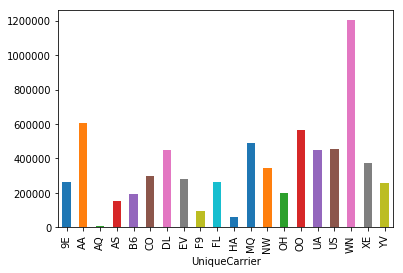

In [10]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

In [13]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


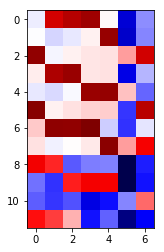

In [16]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

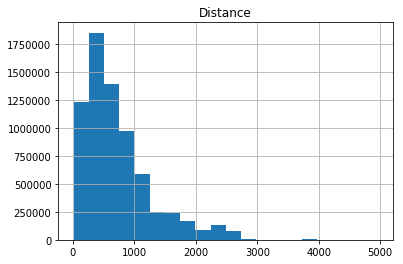

In [17]:
flights_df.hist('Distance', bins=20);

In [18]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

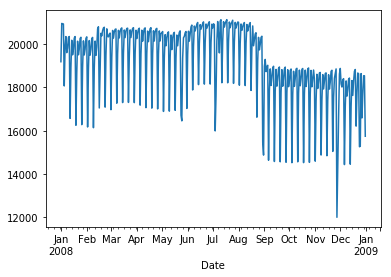

In [21]:
num_flights_by_date = flights_df.groupby('Date').size()
num_flights_by_date.plot()

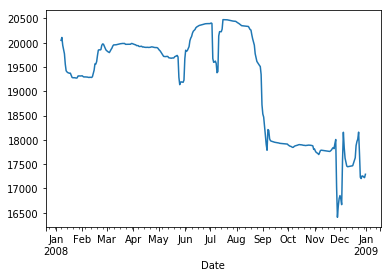

In [22]:
num_flights_by_date.rolling(window=7).mean().plot();

In [23]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [25]:
flights_df['DepHour'].describe().T

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

In [26]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,20.0
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,7.0
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,6.0
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,9.0
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03,18.0


In [27]:
flights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date', 'DepHour'],
      dtype='object')

In [28]:
flights_df.shape

(7009728, 21)

In [60]:
flights_df['FlightNum'].unique().shape

(7539,)

In [64]:
flights_df['flight_code'] = flights_df[['UniqueCarrier',  'FlightNum']].apply(
    lambda _:str(_[0]) + str(_[1]), axis=1
)

In [65]:
flights_df[['UniqueCarrier', 'FlightNum',  'flight_code']].head(10)

,UniqueCarrier,FlightNum,flight_code
0,WN,335,WN335
1,WN,3231,WN3231
2,WN,448,WN448
3,WN,1746,WN1746
4,WN,3920,WN3920
5,WN,378,WN378
6,WN,509,WN509
7,WN,535,WN535
8,WN,11,WN11
9,WN,810,WN810


## 1. How many unique carriers are there in our dataset?

In [47]:
flights_df['UniqueCarrier'].unique().shape[0]

20

In [48]:
flights_df['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

## 2. We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference? 

In [45]:
count_cancelled = flights_df['Cancelled'].value_counts(dropna=False)
count_cancelled

0    6872294
1     137434
Name: Cancelled, dtype: int64

In [40]:
count_cancelled[0] - count_cancelled[1]

6734860

In [44]:
flights_df[flights_df['Dest'].isnull()]['Dest'].value_counts(dropna=False) ip


Series([], Name: Dest, dtype: int64)

## 3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?

In [75]:
flights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date', 'DepHour',
       'flight_code'],
      dtype='object')

In [138]:
flights_df.sort_values(['DepDelay'], ascending=False)[['DepDelay', 'Dest']][:1]

,DepDelay,Dest
2235378,2468.0,MSP


In [139]:
flights_df.sort_values(['ArrDelay'], ascending=False)[['ArrDelay', 'Dest']][:1]

,ArrDelay,Dest
1018798,2460.0,MSP


## 4. Find the carrier that has the greatest number of cancelled flights.

In [144]:
flights_df[flights_df['Cancelled'] == 1].groupby(
    by=['UniqueCarrier']
)['Cancelled'].sum().sort_values(ascending=False)

UniqueCarrier
MQ    18331.0
AA    17440.0
OO    12436.0
WN    12389.0
UA    10541.0
XE     9992.0
YV     9219.0
9E     7100.0
DL     6813.0
US     6582.0
OH     6462.0
EV     5026.0
CO     3702.0
B6     3205.0
NW     2906.0
FL     2236.0
AS     2139.0
HA      570.0
F9      303.0
AQ       42.0
Name: Cancelled, dtype: float64

## 5. Let's examine departure time and consider distribution by hour (column DepHour that we've created earlier). Which hour has the highest percentage of flights?

In [135]:
flights_df.groupby(by=['DepHour']).size().sort_values(ascending=False) * 100 / flights_df.shape[0]

DepHour
8.0     6.408580
6.0     6.373100
11.0    6.344069
7.0     6.229914
13.0    6.218743
9.0     6.203522
16.0    6.191638
17.0    6.169826
10.0    6.155160
12.0    6.052289
14.0    5.947092
15.0    5.865078
18.0    5.717540
19.0    5.525008
20.0    4.079916
21.0    3.635662
5.0     2.113734
22.0    1.706928
23.0    0.657700
0.0     0.290568
1.0     0.083612
4.0     0.048361
2.0     0.026406
3.0     0.011883
dtype: float64

## .6 OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights? *

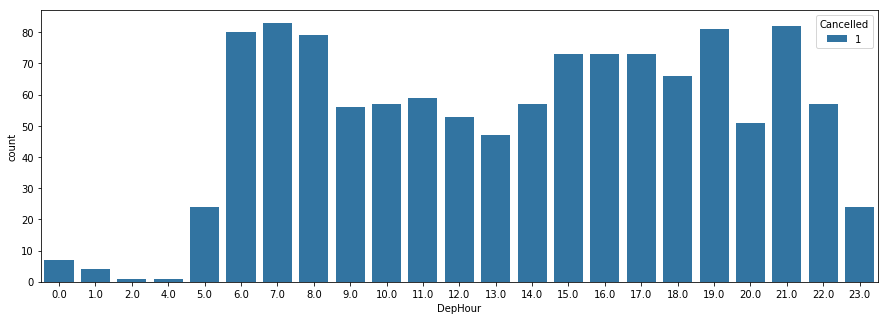

In [112]:
 fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.countplot(x='DepHour', hue="Cancelled",
              data=flights_df[flights_df['Cancelled'] == 1],
              ax=axes)

In [113]:

group_dephour_cancel = flights_df.groupby(by=['DepHour'])['Cancelled'].agg(['count', 'sum'])

group_dephour_cancel['percent'] = group_dephour_cancel[['count', 'sum']].apply(
    lambda _: _[1]*100 / _[0], axis=1
)
group_dephour_cancel.sort_values('percent', ascending=True)


,count,sum,percent
DepHour,,,
3.0,833,0,0.000000
13.0,435917,47,0.010782
12.0,424249,53,0.012493
9.0,434850,56,0.012878
10.0,431460,57,0.013211
11.0,444702,59,0.013267
14.0,416875,57,0.013673
5.0,148167,24,0.016198
18.0,400784,66,0.016468


## 7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.

In [108]:
flights_df.groupby(
    by=['DepHour']
)['Cancelled'].agg(['count', 'sum']).sort_values('sum')

,count,sum
DepHour,,
3.0,833,0
2.0,1851,1
4.0,3390,1
1.0,5861,4
0.0,20368,7
23.0,46103,24
5.0,148167,24
13.0,435917,47
20.0,285991,51


## 8 Encuentre la hora más ocupada, o en otras palabras, la hora en que el número de vuelos salidos alcanza su máximo. *

In [133]:
flights_df[
    flights_df['Cancelled'] == 0
].groupby(by=['DepHour']).size().sort_values(ascending=False)

DepHour
8.0     449145
6.0     446657
11.0    444643
7.0     436617
13.0    435870
9.0     434794
16.0    433944
17.0    432415
10.0    431403
12.0    424196
14.0    416818
15.0    411053
18.0    400718
19.0    387207
20.0    285940
21.0    254768
5.0     148143
22.0    119594
23.0     46079
0.0      20361
1.0       5857
4.0       3389
2.0       1850
3.0        833
dtype: int64

## 9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happe?

In [142]:
flights_df[
    flights_df['Cancelled'] == 0
].groupby(by=['DepHour'])['DepDelay'].mean()

DepHour
0.0      70.750000
1.0     111.812500
2.0     122.562500
3.0      95.812500
4.0       3.375000
5.0      -4.253906
6.0      -1.629883
7.0       0.102539
8.0       1.760742
9.0       3.753906
10.0      5.460938
11.0      6.683594
12.0      7.902344
13.0      8.812500
14.0     10.351562
15.0     11.875000
16.0     11.882812
17.0     13.210938
18.0     15.343750
19.0     16.875000
20.0     22.781250
21.0     23.031250
22.0     38.031250
23.0     60.000000
Name: DepDelay, dtype: float16

## 10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?

In [148]:
flights_df[
    (flights_df['Cancelled'] == 0) & (flights_df['UniqueCarrier'] == 'MQ')
].groupby(by=['DepHour']).size().sort_values(ascending=False)

DepHour
10.0    33063
9.0     32596
11.0    31863
13.0    31295
16.0    31276
6.0     30982
15.0    30904
14.0    30149
12.0    30043
7.0     29840
18.0    29362
17.0    28864
8.0     28757
19.0    25493
20.0    18664
5.0     12732
21.0    12086
22.0     3471
23.0      741
0.0       163
1.0        14
2.0         4
dtype: int64

## 11. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?Which of the listed below is not in your top-10 list?

In [154]:
flights_df[
    flights_df['Cancelled'] == 0
].groupby(by=['UniqueCarrier']).size().sort_values(ascending=False)[:10]

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

## 12. What is the most frequent reason for flight cancellation? *

In [155]:
flights_df[flights_df['Cancelled'] == 1]['CancellationCode'].value_counts(dropna=False)

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

## 13. Which route is the most frequent, in terms of the number of flights?

In [161]:
flights_df.groupby(by=['Origin', 'Dest']).size().sort_values(ascending=False)

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
LGA     BOS     12035
BOS     LGA     12029
HNL     OGG     12014
LAX     LAS     11773
LAS     LAX     11729
LAX     SAN     11257
SAN     LAX     11224
DCA     LGA     11102
LGA     DCA     11063
        ORD     10862
ORD     LGA     10770
HNL     LIH     10769
LAS     PHX     10626
LGA     ATL     10507
ATL     LGA     10506
LIH     HNL     10407
PHX     LAS     10337
        LAX      9992
LAX     PHX      9897
DFW     ATL      9849
ATL     DFW      9847
DAL     HOU      9790
HOU     DAL      9766
ORD     MSP      9688
ATL     MCO      9613
MCO     ATL      9611
MSP     ORD      9356
                ...  
MCI     LNK         1
        MGM         1
SGF     FSD         1
BTR     MSY         1
SFO     SJC         1
AVP     HPN         1
SJC     BFL         1
LNK     ABE         1
LMT     MFR         1
LIT     SAT         1
PSP     ONT         1
        TWF         1
ATW     CHS         1
        DSM        

## 14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

In [168]:
flights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date', 'DepHour',
       'flight_code'],
      dtype='object')

In [190]:
flights_df[
    flights_df['DepDelay'] > 0
].groupby(
    by=['Origin', 'Dest']
).size().sort_values(ascending=False)[:5]

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
dtype: int64

In [191]:
top_5 = flights_df[
    ((flights_df['Origin'] == 'LAX') & (flights_df['Dest'] == 'SFO')) |
    ((flights_df['Origin'] == 'DAL') & (flights_df['Dest'] == 'HOU')) |
    ((flights_df['Origin'] == 'SFO') & (flights_df['Dest'] == 'LAX')) |
    ((flights_df['Origin'] == 'ORD') & (flights_df['Dest'] == 'LGA')) |
    ((flights_df['Origin'] == 'HOU') & (flights_df['Dest'] == 'DAL'))
]

In [193]:
top_5[top_5['WeatherDelay'] > 0].shape[0]

668

In [ ]:
## 15

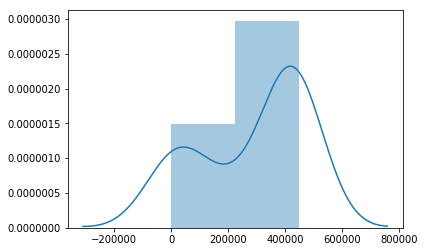

In [175]:
sns.distplot(flights_df.groupby(by=['DepHour']).size().sort_index())

In [194]:
flights_df.groupby(by=['DepHour']).size().sort_index()

DepHour
0.0      20368
1.0       5861
2.0       1851
3.0        833
4.0       3390
5.0     148167
6.0     446737
7.0     436700
8.0     449224
9.0     434850
10.0    431460
11.0    444702
12.0    424249
13.0    435917
14.0    416875
15.0    411126
16.0    434017
17.0    432488
18.0    400784
19.0    387288
20.0    285991
21.0    254850
22.0    119651
23.0     46103
dtype: int64

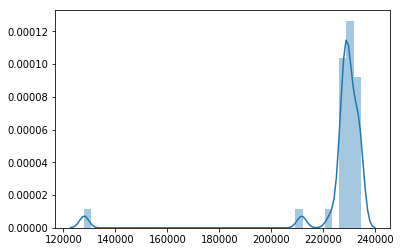

In [180]:
sns.distplot(flights_df.groupby(by=['DayofMonth']).size().sort_index())

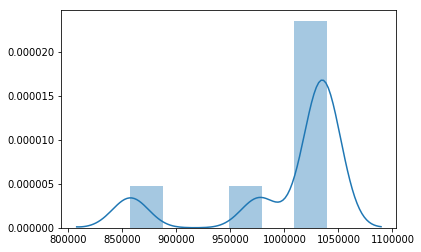

In [181]:
sns.distplot(flights_df.groupby(by=['DayOfWeek']).size().sort_index())

In [183]:
flights_df.groupby(by=['DayOfWeek']).size().sort_index()

DayOfWeek
1    1036201
2    1032049
3    1039665
4    1032224
5    1035166
6     857536
7     976887
dtype: int64

In [184]:
flights_df.groupby(by=['Month']).size().sort_index()

Month
1     605765
2     569236
3     616090
4     598126
5     606293
6     608665
7     627931
8     612279
9     540908
10    556205
11    523272
12    544958
dtype: int64

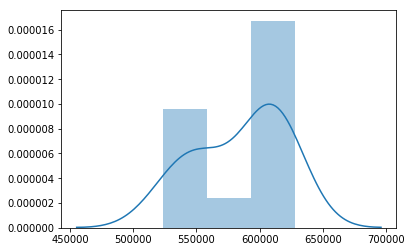

In [182]:
sns.distplot(flights_df.groupby(by=['Month']).size().sort_index())

In [179]:
flights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date', 'DepHour',
       'flight_code'],
      dtype='object')

In [186]:
flights_df['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [196]:
flights_df[flights_df['DepDelay'] > 0].groupby(by=['UniqueCarrier'])['DepDelay'].mean().sort_values()

UniqueCarrier
AQ    15.796875
F9    19.812500
HA    19.812500
WN    22.375000
US    26.671875
AS    27.578125
DL    28.250000
CO    29.750000
NW    30.843750
FL    32.687500
OO    34.000000
MQ    34.968750
AA    36.093750
9E    36.531250
UA    37.656250
EV    38.406250
XE    38.875000
B6    44.250000
OH    45.343750
YV    48.718750
Name: DepDelay, dtype: float16

In [197]:
flights_df[flights_df['ArrDelay'] > 0].groupby(by=['UniqueCarrier'])['ArrDelay'].mean().sort_values()

UniqueCarrier
AQ    12.148438
HA    18.296875
F9    21.187500
WN    26.906250
AS    27.546875
DL    27.937500
US    28.078125
NW    28.218750
FL    31.125000
OO    31.390625
9E    32.093750
CO    34.000000
OH    34.250000
MQ    35.250000
AA    35.500000
EV    35.875000
XE    36.843750
YV    37.468750
UA    38.718750
B6    42.781250
Name: ArrDelay, dtype: float16